In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de visualizaciones
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# Cargar datos limpios
tpm = pd.read_csv("../data/processed/transporte_publico_madrid_limpio.csv", parse_dates=['fecha'])
accidentes = pd.read_csv("../data/processed/accidentes_madrid_limpio.csv", parse_dates=['fecha', 'fecha_hora'])

Análisis Descriptivo del Transporte Público

ANÁLISIS DESCRIPTIVO - TRANSPORTE PÚBLICO DE MADRID

1. RESUMEN ESTADÍSTICO:
                 count       mean        std   min     25%     50%      75%  \
modo_transporte                                                               
Autobús Urbano   162.0  33.557531   7.507119  3.12  30.735  35.155  38.2050   
Metro            162.0  49.093457  11.182542  4.86  46.065  51.115  56.5825   

                   max  
modo_transporte         
Autobús Urbano   47.56  
Metro            69.47  


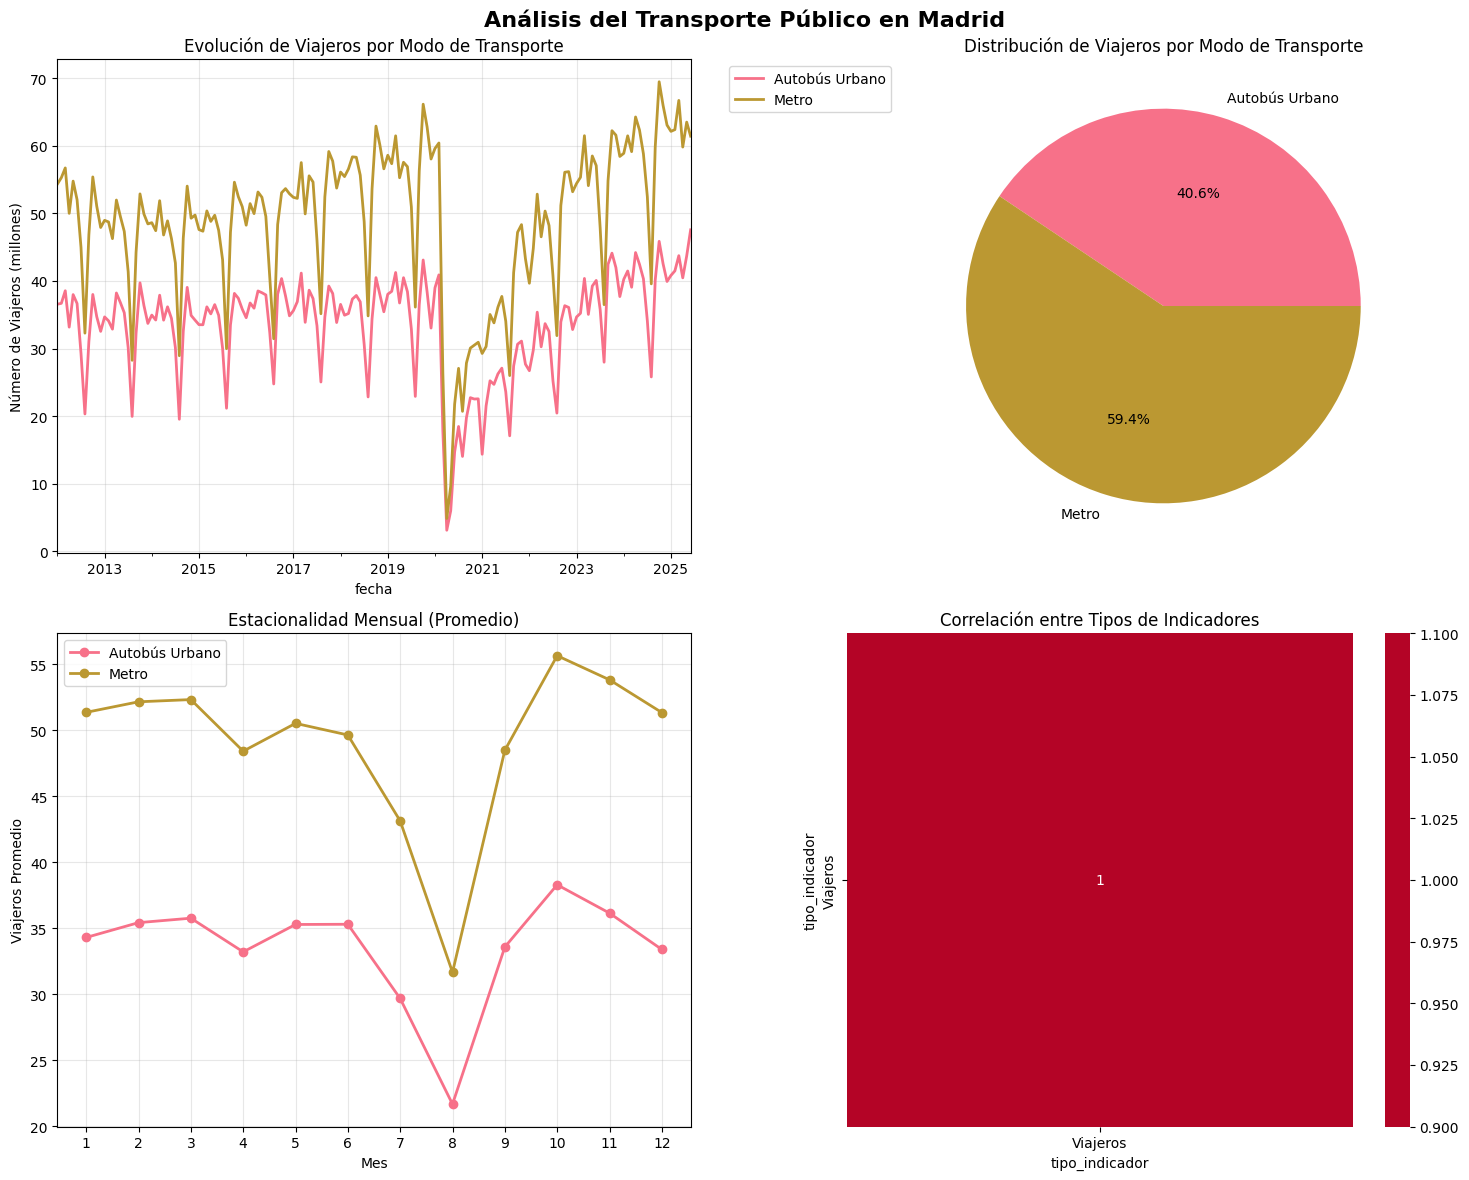


2. ANÁLISIS DE TENDENCIAS:
Crecimiento interanual (%):
  2013: -4.48%
  2014: 0.12%
  2015: 1.3%
  2016: 4.02%
  2017: 3.89%
  2018: 2.21%
  2019: 3.71%
  2020: -47.07%
  2021: 24.93%
  2022: 27.85%
  2023: 18.22%
  2024: 6.66%
  2025: -46.8%

3. DETECCIÓN DE VALORES ATÍPICOS:
  Autobús Urbano: 8 valores atípicos detectados
  Metro: 13 valores atípicos detectados


In [10]:
def analisis_transporte_publico(tpm_data):
    print("=" * 60)
    print("ANÁLISIS DESCRIPTIVO - TRANSPORTE PÚBLICO DE MADRID")
    print("=" * 60)
    
    # 1. Resumen estadístico básico
    print("\n1. RESUMEN ESTADÍSTICO:")
    print(tpm_data.groupby('modo_transporte')['valor'].describe())
    
    # 2. Evolución temporal del transporte público
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Análisis del Transporte Público en Madrid', fontsize=16, fontweight='bold')
    
    # 2.1. Evolución temporal por modo de transporte (Viajeros)
    viajeros_data = tpm_data[tpm_data['tipo_indicador'] == 'Viajeros']
    viajeros_pivot = viajeros_data.pivot_table(
        index='fecha', 
        columns='modo_transporte', 
        values='valor', 
        aggfunc='sum'
    ).fillna(0)
    
    viajeros_pivot.plot(ax=axes[0, 0], linewidth=2)
    axes[0, 0].set_title('Evolución de Viajeros por Modo de Transporte')
    axes[0, 0].set_ylabel('Número de Viajeros (millones)')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # 2.2. Distribución por modo de transporte
    distribucion = viajeros_data.groupby('modo_transporte')['valor'].sum()
    axes[0, 1].pie(distribucion, labels=distribucion.index, autopct='%1.1f%%')
    axes[0, 1].set_title('Distribución de Viajeros por Modo de Transporte')
    
    # 2.3. Estacionalidad (promedio mensual)
    viajeros_data['mes'] = viajeros_data['fecha'].dt.month
    mensual = viajeros_data.groupby(['mes', 'modo_transporte'])['valor'].mean().reset_index()
    
    for transporte in mensual['modo_transporte'].unique():
        data_transporte = mensual[mensual['modo_transporte'] == transporte]
        axes[1, 0].plot(data_transporte['mes'], data_transporte['valor'], 
                       marker='o', label=transporte, linewidth=2)
    
    axes[1, 0].set_title('Estacionalidad Mensual (Promedio)')
    axes[1, 0].set_xlabel('Mes')
    axes[1, 0].set_ylabel('Viajeros Promedio')
    axes[1, 0].set_xticks(range(1, 13))
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].legend()
    
    # 2.4. Comparación entre tipos de indicador
    indicadores_comparacion = tpm_data.pivot_table(
        index='fecha', 
        columns='tipo_indicador', 
        values='valor', 
        aggfunc='sum'
    ).corr()
    
    sns.heatmap(indicadores_comparacion, annot=True, cmap='coolwarm', 
                center=0, ax=axes[1, 1])
    axes[1, 1].set_title('Correlación entre Tipos de Indicadores')
    
    plt.tight_layout()
    plt.savefig('../visualizations/transporte_publico_analisis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 3. Análisis de tendencias
    print("\n2. ANÁLISIS DE TENDENCIAS:")
    viajeros_anual = viajeros_data.groupby(viajeros_data['fecha'].dt.year)['valor'].sum()
    crecimiento = (viajeros_anual.pct_change() * 100).round(2)
    
    print("Crecimiento interanual (%):")
    for año, porcentaje in crecimiento.items():
        if not pd.isna(porcentaje):
            print(f"  {año}: {porcentaje}%")
    
    # 4. Identificación de valores atípicos
    print("\n3. DETECCIÓN DE VALORES ATÍPICOS:")
    for transporte in viajeros_data['modo_transporte'].unique():
        data_transporte = viajeros_data[viajeros_data['modo_transporte'] == transporte]['valor']
        Q1 = data_transporte.quantile(0.25)
        Q3 = data_transporte.quantile(0.75)
        IQR = Q3 - Q1
        outliers = data_transporte[(data_transporte < (Q1 - 1.5 * IQR)) | 
                                  (data_transporte > (Q3 + 1.5 * IQR))]
        
        if len(outliers) > 0:
            print(f"  {transporte}: {len(outliers)} valores atípicos detectados")
    
    return viajeros_data

# Ejecutar análisis de transporte público
tpm_viajeros = analisis_transporte_publico(tpm)

Análisis Descriptivo de Accidentes

ANÁLISIS DESCRIPTIVO - ACCIDENTES EN MADRID

1. RESUMEN GENERAL:
Total de accidentes analizados: 28,454
Período: 2025-01-01 a 2025-07-31


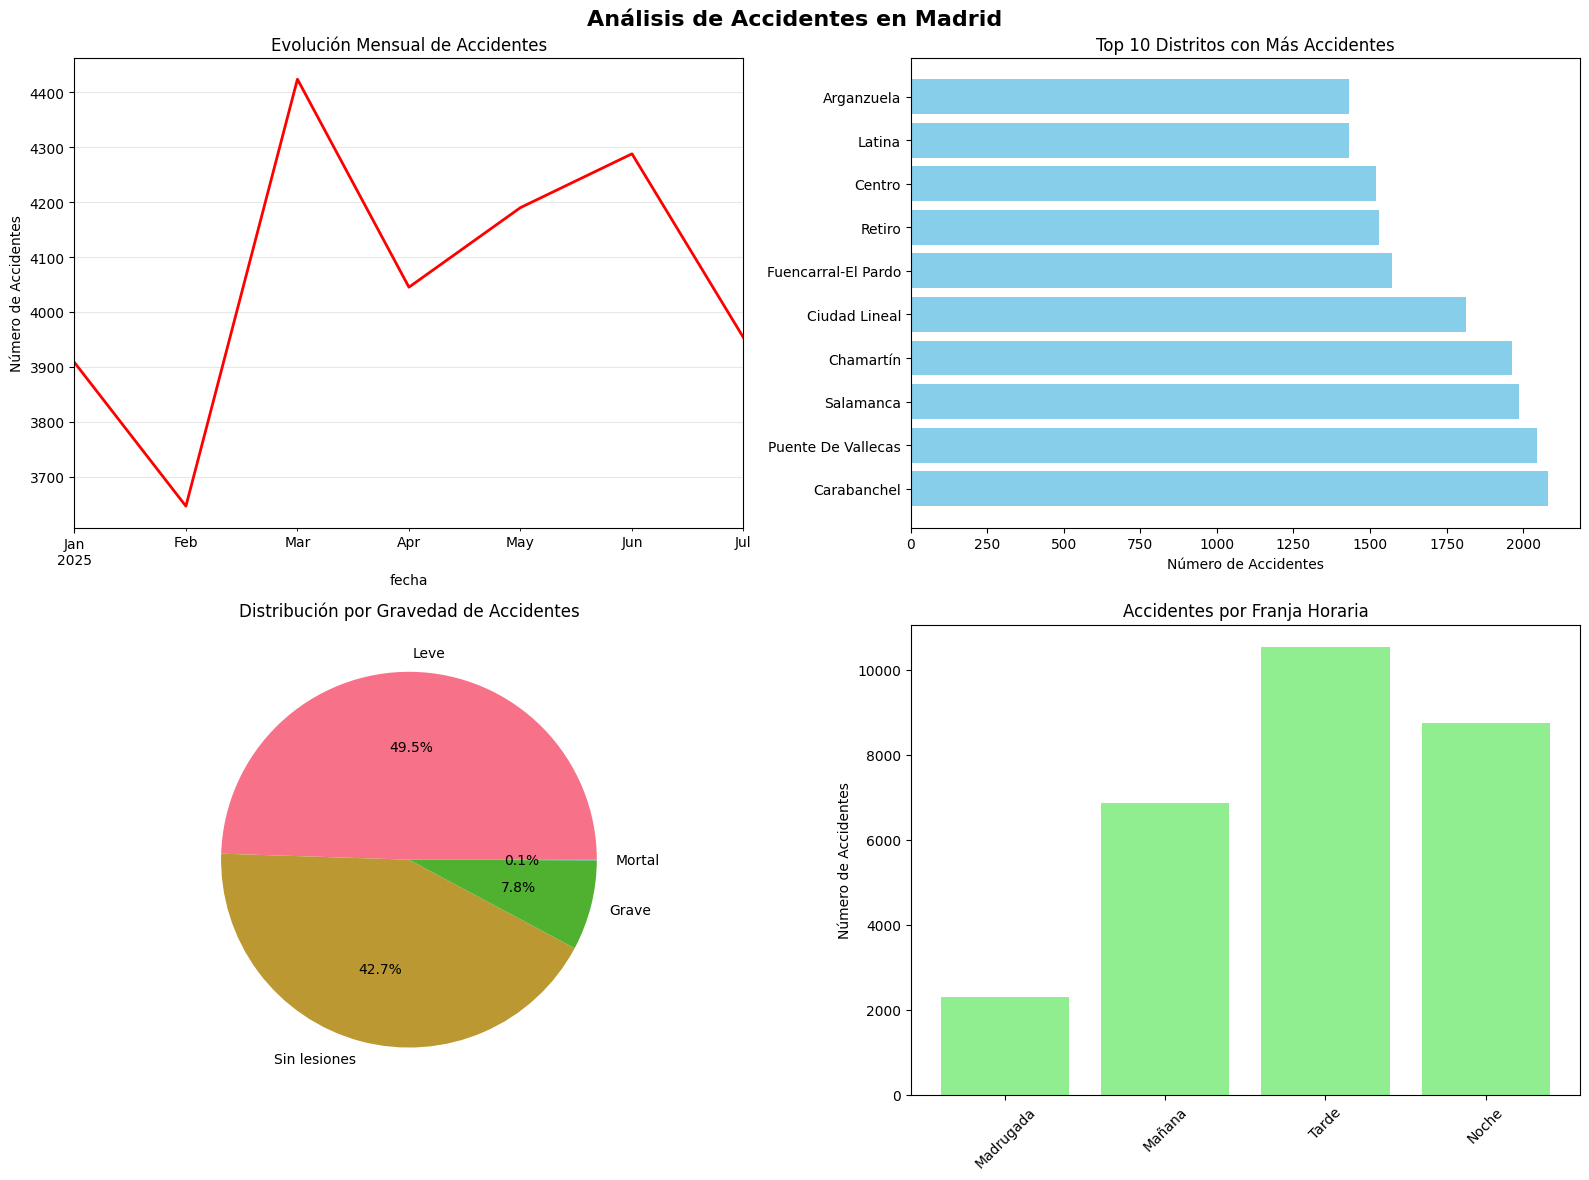

KeyError: "['0-5', '75+'] not in index"

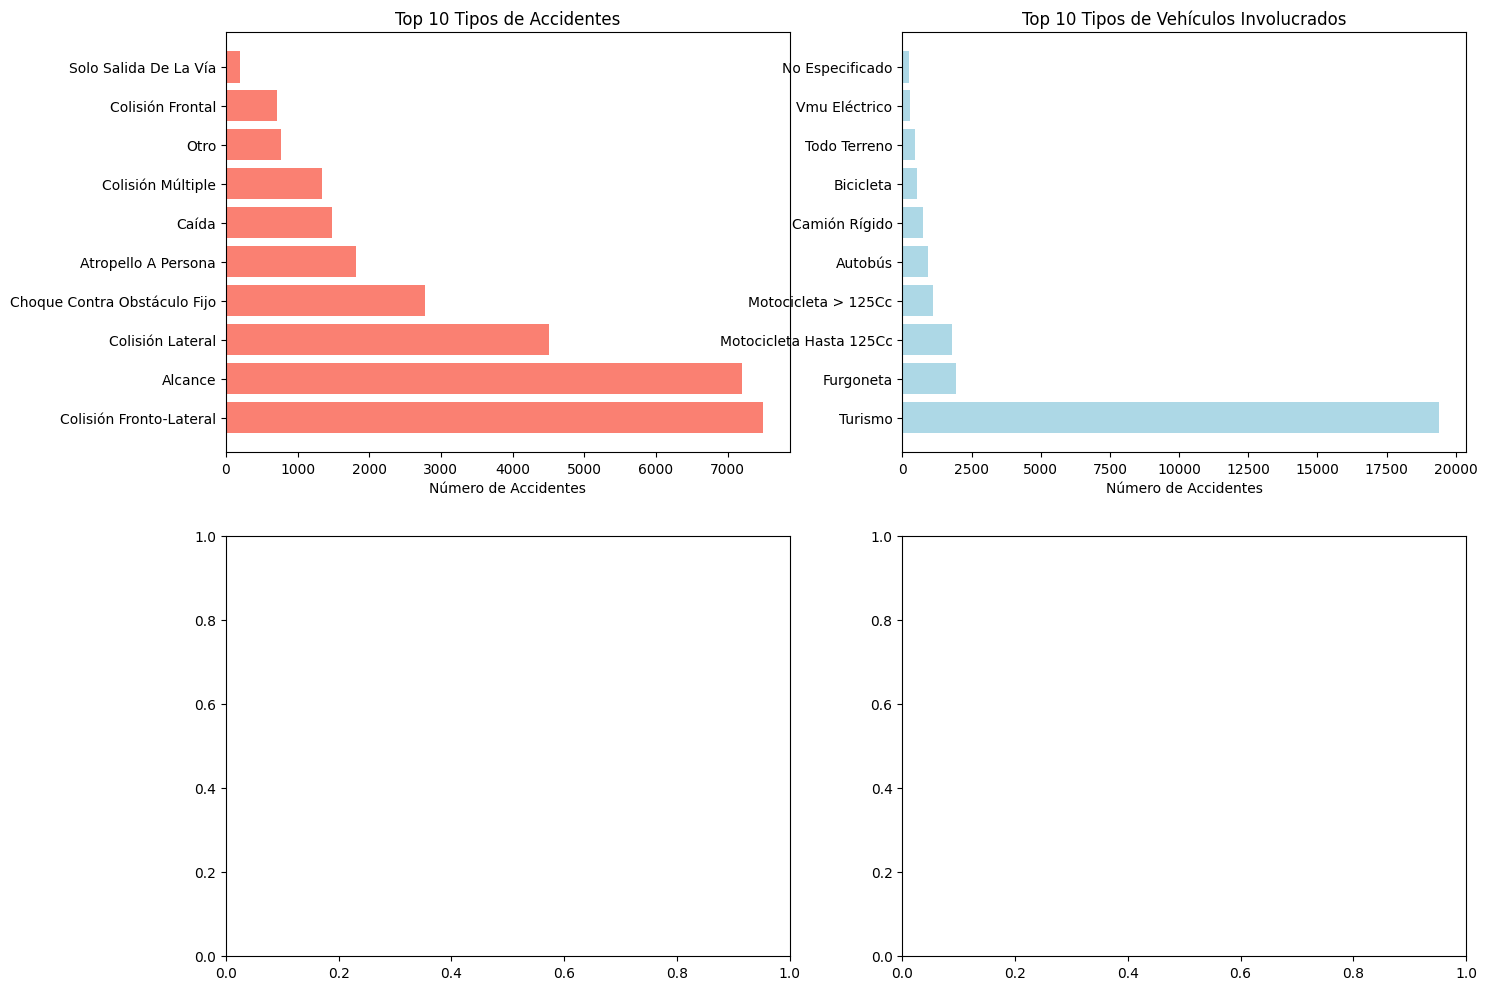

In [ ]:
def analisis_accidentes(accidentes_data):
    print("=" * 60)
    print("ANÁLISIS DESCRIPTIVO - ACCIDENTES EN MADRID")
    print("=" * 60)
    
    # 1. Resumen general
    print("\n1. RESUMEN GENERAL:")
    print(f"Total de accidentes analizados: {len(accidentes_data):,}")
    print(f"Período: {accidentes_data['fecha'].min().strftime('%Y-%m-%d')} a {accidentes_data['fecha'].max().strftime('%Y-%m-%d')}")
    
    # 2. Estadísticas básicas
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Análisis de Accidentes en Madrid', fontsize=16, fontweight='bold')
    
    # 2.1. Evolución temporal de accidentes
    accidentes_mensuales = accidentes_data.resample('M', on='fecha').size()
    accidentes_mensuales.plot(ax=axes[0, 0], linewidth=2, color='red')
    axes[0, 0].set_title('Evolución Mensual de Accidentes')
    axes[0, 0].set_ylabel('Número de Accidentes')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2.2. Distribución por distritos (top 10)
    distritos_top10 = accidentes_data['distrito'].value_counts().head(10)
    axes[0, 1].barh(distritos_top10.index, distritos_top10.values, color='skyblue')
    axes[0, 1].set_title('Top 10 Distritos con Más Accidentes')
    axes[0, 1].set_xlabel('Número de Accidentes')
    
    # 2.3. Distribución por gravedad
    gravedad_counts = accidentes_data['gravedad'].value_counts()
    axes[1, 0].pie(gravedad_counts.values, labels=gravedad_counts.index, autopct='%1.1f%%')
    axes[1, 0].set_title('Distribución por Gravedad de Accidentes')
    
    # 2.4. Distribución por franja horaria
    franja_orden = ['Madrugada', 'Mañana', 'Tarde', 'Noche']
    franja_data = accidentes_data['franja_horaria'].value_counts()[franja_orden]
    axes[1, 1].bar(franja_data.index, franja_data.values, color='lightgreen')
    axes[1, 1].set_title('Accidentes por Franja Horaria')
    axes[1, 1].set_ylabel('Número de Accidentes')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig('../visualizations/accidentes_analisis_general.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 3. Análisis detallado por categorías
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 3.1. Tipos de accidente más comunes
    tipo_accidente_top10 = accidentes_data['tipo_accidente'].value_counts().head(10)
    axes[0, 0].barh(tipo_accidente_top10.index, tipo_accidente_top10.values, color='salmon')
    axes[0, 0].set_title('Top 10 Tipos de Accidentes')
    axes[0, 0].set_xlabel('Número de Accidentes')
    
    # 3.2. Tipos de vehículo involucrados
    vehiculo_top10 = accidentes_data['tipo_vehiculo'].value_counts().head(10)
    axes[0, 1].barh(vehiculo_top10.index, vehiculo_top10.values, color='lightblue')
    axes[0, 1].set_title('Top 10 Tipos de Vehículos Involucrados')
    axes[0, 1].set_xlabel('Número de Accidentes')
    
    # 3.3. Distribución por edad
    edad_orden = ['0-5', '6-9', '10-14', '15-17', '18-20', '21-24', '25-29', 
                 '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', 
                 '60-64', '65-69', '70-74', '75+', 'Desconocido']
    edad_data = accidentes_data['rango_edad'].value_counts().reindex(edad_orden, fill_value=0)
    axes[1, 0].bar(edad_data.index, edad_data.values, color='lightcoral')
    axes[1, 0].set_title('Distribución por Rango de Edad')
    axes[1, 0].set_ylabel('Número de Accidentes')
    axes[1, 0].tick_params(axis='x', rotation=90)
    
    # 3.4. Distribución por sexo
    sexo_data = accidentes_data['sexo'].value_counts()
    axes[1, 1].pie(sexo_data.values, labels=sexo_data.index, autopct='%1.1f%%')
    axes[1, 1].set_title('Distribución por Sexo')
    
    plt.tight_layout()
    plt.savefig('../visualizations/accidentes_analisis_detallado.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 4. Análisis de correlaciones y patrones
    print("\n2. ESTADÍSTICAS DETALLADAS:")
    
    # Por distrito y gravedad
    print("\nAccidentes por Distrito y Gravedad:")
    tabla_gravedad_distrito = pd.crosstab(accidentes_data['distrito'], accidentes_data['gravedad'])
    print(tabla_gravedad_distrito)
    
    # Por tipo de vehículo y gravedad
    print("\nAccidentes por Tipo de Vehículo y Gravedad:")
    tabla_vehiculo_gravedad = pd.crosstab(accidentes_data['tipo_vehiculo'], accidentes_data['gravedad'])
    print(tabla_vehiculo_gravedad.head(10))
    
    # 5. Análisis temporal detallado
    print("\n3. ANÁLISIS TEMPORAL:")
    
    # Por día de la semana
    dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    accidentes_dia_semana = accidentes_data['dia_semana'].value_counts().reindex(dias_semana)
    print("\nAccidentes por día de la semana:")
    print(accidentes_dia_semana)
    
    # Por hora del día
    accidentes_hora = accidentes_data['hora_dia'].value_counts().sort_index()
    print("\nAccidentes por hora del día:")
    print(accidentes_hora.head(24))
    
    return accidentes_data

# Ejecutar análisis de accidentes
accidentes_analizados = analisis_accidentes(accidentes)

Análisis Conjunto: Transporte Público vs. Accidentes

ANÁLISIS CONJUNTO - TRANSPORTE PÚBLICO VS. ACCIDENTES

Correlación entre viajeros de transporte público y accidentes: 0.721


FileNotFoundError: [Errno 2] No such file or directory: '../visualizations/relacion_transporte_accidentes.png'

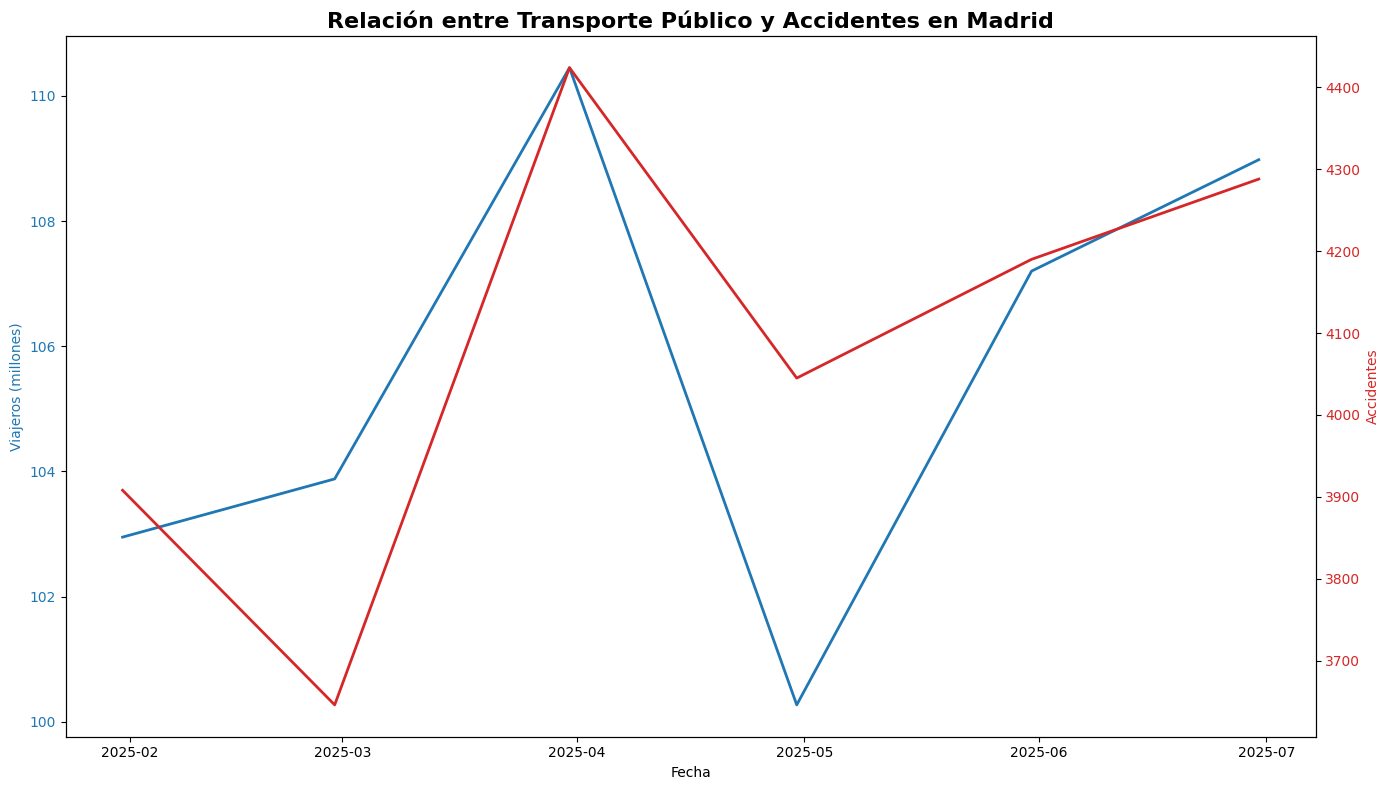

In [7]:
def analisis_conjunto(tpm_data, accidentes_data):
    print("=" * 60)
    print("ANÁLISIS CONJUNTO - TRANSPORTE PÚBLICO VS. ACCIDENTES")
    print("=" * 60)
    
    # Preparar datos para análisis conjunto
    tpm_mensual = tpm_data[tpm_data['tipo_indicador'] == 'Viajeros']
    tpm_mensual = tpm_mensual.groupby(pd.Grouper(key='fecha', freq='M'))['valor'].sum().reset_index()
    tpm_mensual.rename(columns={'valor': 'viajeros'}, inplace=True)
    
    accidentes_mensual = accidentes_data.groupby(pd.Grouper(key='fecha', freq='M')).size().reset_index()
    accidentes_mensual.rename(columns={0: 'accidentes'}, inplace=True)
    
    # Unir datos
    datos_conjuntos = pd.merge(tpm_mensual, accidentes_mensual, on='fecha', how='inner')
    
    # Calcular correlación
    correlacion = datos_conjuntos[['viajeros', 'accidentes']].corr().iloc[0, 1]
    print(f"\nCorrelación entre viajeros de transporte público y accidentes: {correlacion:.3f}")
    
    # Visualización conjunta
    fig, ax1 = plt.subplots(figsize=(14, 8))
    
    # Gráfico de líneas para viajeros
    color = 'tab:blue'
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Viajeros (millones)', color=color)
    ax1.plot(datos_conjuntos['fecha'], datos_conjuntos['viajeros'], color=color, linewidth=2, label='Viajeros')
    ax1.tick_params(axis='y', labelcolor=color)
    
    # Gráfico de líneas para accidentes (eje secundario)
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Accidentes', color=color)
    ax2.plot(datos_conjuntos['fecha'], datos_conjuntos['accidentes'], color=color, linewidth=2, label='Accidentes')
    ax2.tick_params(axis='y', labelcolor=color)
    
    plt.title('Relación entre Transporte Público y Accidentes en Madrid', fontsize=16, fontweight='bold')
    fig.tight_layout()
    plt.savefig('../visualizations/relacion_transporte_accidentes.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Análisis de regresión simple
    from sklearn.linear_model import LinearRegression
    
    X = datos_conjuntos['viajeros'].values.reshape(-1, 1)
    y = datos_conjuntos['accidentes'].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    print(f"\nModelo de regresión lineal:")
    print(f"  Coeficiente: {model.coef_[0]:.4f}")
    print(f"  Intercepto: {model.intercept_:.2f}")
    print(f"  R²: {model.score(X, y):.4f}")
    
    # Gráfico de dispersión con línea de regresión
    plt.figure(figsize=(10, 6))
    plt.scatter(datos_conjuntos['viajeros'], datos_conjuntos['accidentes'], alpha=0.6)
    
    # Línea de regresión
    x_range = np.linspace(datos_conjuntos['viajeros'].min(), datos_conjuntos['viajeros'].max(), 100)
    y_pred = model.predict(x_range.reshape(-1, 1))
    plt.plot(x_range, y_pred, color='red', linewidth=2)
    
    plt.xlabel('Viajeros de Transporte Público (millones)')
    plt.ylabel('Número de Accidentes')
    plt.title('Relación entre Viajeros y Accidentes (Regresión Lineal)', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.savefig('../visualizations/regresion_transporte_accidentes.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return datos_conjuntos, correlacion

# Ejecutar análisis conjunto
datos_conjuntos, correlacion = analisis_conjunto(tpm, accidentes)

Generación de Reporte de Análisis Descriptivo

In [8]:
def generar_reporte_descriptivo(tpm_data, accidentes_data, datos_conjuntos, correlacion):
    print("=" * 60)
    print("REPORTE DE ANÁLISIS DESCRIPTIVO")
    print("=" * 60)
    
    # Crear directorio para reportes
    import os
    os.makedirs("../reports", exist_ok=True)
    
    # Generar reporte en formato Markdown
    with open("../reports/analisis_descriptivo.md", "w", encoding="utf-8") as f:
        f.write("# Reporte de Análisis Descriptivo - Transporte y Accidentes Madrid\n\n")
        
        f.write("## 1. Resumen Ejecutivo\n\n")
        f.write(f"- Período analizado: {tpm_data['fecha'].min().strftime('%Y-%m')} a {tpm_data['fecha'].max().strftime('%Y-%m')}\n")
        f.write(f"- Total de registros de transporte: {len(tpm_data):,}\n")
        f.write(f"- Total de accidentes analizados: {len(accidentes_data):,}\n")
        f.write(f"- Correlación entre transporte y accidentes: {correlacion:.3f}\n\n")
        
        f.write("## 2. Transporte Público\n\n")
        f.write("### 2.1. Distribución por Modo de Transporte\n")
        distribucion = tpm_data[tpm_data['tipo_indicador'] == 'Viajeros'].groupby('modo_transporte')['valor'].sum()
        for transporte, valor in distribucion.items():
            f.write(f"- {transporte}: {valor:,.0f} viajeros\n")
        
        f.write("\n### 2.2. Tendencia Temporal\n")
        crecimiento = tpm_data[tpm_data['tipo_indicador'] == 'Viajeros'].groupby(tpm_data['fecha'].dt.year)['valor'].sum().pct_change() * 100
        for año, porcentaje in crecimiento.items():
            if not pd.isna(porcentaje):
                f.write(f"- {año}: {porcentaje:.2f}% de crecimiento\n")
        
        f.write("\n## 3. Accidentes de Tráfico\n\n")
        f.write("### 3.1. Distribución por Gravedad\n")
        gravedad = accidentes_data['gravedad'].value_counts()
        for tipo, count in gravedad.items():
            porcentaje = (count / len(accidentes_data)) * 100
            f.write(f"- {tipo}: {count:,} ({porcentaje:.1f}%)\n")
        
        f.write("\n### 3.2. Distribución Temporal\n")
        f.write(f"- Promedio mensual de accidentes: {accidentes_data.resample('M', on='fecha').size().mean():.1f}\n")
        f.write(f"- Día con más accidentes: {accidentes_data['dia_semana'].value_counts().index[0]}\n")
        f.write(f"- Franja horaria más peligrosa: {accidentes_data['franja_horaria'].value_counts().index[0]}\n")
        
        f.write("\n### 3.3. Distribución Geográfica\n")
        f.write("Top 5 distritos con más accidentes:\n")
        for i, (distrito, count) in enumerate(accidentes_data['distrito'].value_counts().head(5).items()):
            f.write(f"{i+1}. {distrito}: {count:,} accidentes\n")
        
        f.write("\n## 4. Relación entre Transporte Público y Accidentes\n\n")
        f.write(f"- Coeficiente de correlación: {correlacion:.3f}\n")
        if correlacion > 0.5:
            f.write("- Existe una correlación positiva moderada-fuerte\n")
        elif correlacion > 0.3:
            f.write("- Existe una correlación positiva débil-moderada\n")
        elif correlacion > -0.3:
            f.write("- La correlación es muy débil o inexistente\n")
        else:
            f.write("- Existe una correlación negativa\n")
        
        f.write("\n## 5. Conclusiones Principales\n\n")
        f.write("1. El transporte público muestra patrones estacionales claros\n")
        f.write("2. Los accidentes presentan distribución desigual por distritos\n")
        f.write("3. Existen franjas horarias con mayor incidencia de accidentes\n")
        f.write("4. La relación entre transporte y accidentes requiere análisis más detallado\n")
    
    print("Reporte generado en: ../reports/analisis_descriptivo.md")
    
    # Generar resumen estadístico en CSV
    resumen_estadistico = {
        'metricas': ['Total registros', 'Período inicio', 'Período fin', 
                    'Correlación transporte-accidentes', 'Accidentes promedio mensual'],
        'valores': [
            len(accidentes_data),
            accidentes_data['fecha'].min().strftime('%Y-%m'),
            accidentes_data['fecha'].max().strftime('%Y-%m'),
            correlacion,
            accidentes_data.resample('M', on='fecha').size().mean()
        ]
    }
    
    pd.DataFrame(resumen_estadistico).to_csv("../reports/resumen_estadistico.csv", index=False)
    print("Resumen estadístico generado en: ../reports/resumen_estadistico.csv")

# Generar reporte
generar_reporte_descriptivo(tpm, accidentes, datos_conjuntos, correlacion)

NameError: name 'datos_conjuntos' is not defined